# 02. Decision Trees and Random Forest | أشجار القرار والغابة العشوائية

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Unit 3, Example 1: Logistic Regression** - Understanding classification basics
- ✅ **Understanding of overfitting**: What happens when models are too complex
- ✅ **Basic decision-making concepts**: If-then rules

**If you haven't completed these**, you might struggle with:
- Understanding how decision trees make predictions
- Knowing when to use decision trees vs logistic regression
- Understanding how Random Forest improves on single trees

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is Unit 3, Example 2** - it introduces tree-based classification models!

**Why this example SECOND in Unit 3?**
- **Before** you can use tree-based models, you need to understand basic classification
- **Before** you can use Random Forest, you need to understand single decision trees
- **Before** you can handle complex data, you need to see how trees handle non-linear patterns

**Builds on**: 
- 📓 Unit 3, Example 1: Logistic Regression (we know classification basics)
- 📓 Unit 1, Example 5: Polynomial Regression (we saw overfitting!)

**Leads to**: 
- 📓 Example 3: SVM (another advanced classifier)
- 📓 Unit 5, Example 2: Boosting (uses trees as base learners)
- 📓 All tree-based models (XGBoost, LightGBM, etc.)

**Why this order?**
1. Decision trees are **interpretable** (easy to understand)
2. Decision trees handle **non-linear patterns** (better than logistic regression for complex data)
3. Random Forest shows **ensemble methods** (combining multiple models improves performance)

---

## The Story: Making Decisions Like a Tree | القصة: اتخاذ القرارات مثل الشجرة

Imagine you're deciding what to wear. **Before** decision trees, you use a simple rule (like logistic regression). **After** decision trees, you use a series of questions: "Is it raining? → Yes → Wear raincoat. No → Is it cold? → Yes → Wear jacket..." - much more flexible!

Same with machine learning: **Before** decision trees, we use simple linear boundaries. **After** decision trees, we use complex if-then rules that can handle any pattern!

---

## Why Decision Trees Matter | لماذا تهم أشجار القرار؟

Decision trees are powerful and interpretable:
- **Interpretable**: You can see exactly how decisions are made (if-then rules)
- **Non-Linear**: Can handle complex patterns that linear models can't
- **Feature Importance**: Automatically shows which features matter most
- **No Scaling Needed**: Works with raw data (unlike logistic regression)
- **Random Forest**: Combines many trees for better performance

## Learning Objectives | أهداف التعلم
1. Build decision tree classifiers
2. Understand how trees make decisions (if-then rules)
3. Control overfitting with pruning (max_depth)
4. Build Random Forest models (ensemble of trees)
5. Interpret feature importance
6. Compare tree-based models with other classifiers

In [1]:
# Step 1: Import necessary libraries
# These libraries help us build tree-based classification models

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For beautiful plots
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.tree import DecisionTreeClassifier  # Single decision tree
from sklearn.ensemble import RandomForestClassifier  # Ensemble of trees (Random Forest)
from sklearn.preprocessing import StandardScaler  # For scaling (trees don't need it, but shown for consistency)
from sklearn.metrics import (
    accuracy_score,        # Classification accuracy
    classification_report,  # Comprehensive metrics
    confusion_matrix,      # Confusion matrix
    roc_auc_score,         # AUC score
    roc_curve              # ROC curve
)
from sklearn.datasets import make_classification  # For generating sample data

print("✅ Libraries imported successfully!")
print("\n📚 What each model does:")
print("   - DecisionTreeClassifier: Single tree (interpretable, can overfit)")
print("   - RandomForestClassifier: Many trees combined (less overfitting, better performance)")
print("   - Note: Trees don't require feature scaling (unlike logistic regression)!")


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


✅ Libraries imported successfully!

📚 What each model does:
   - DecisionTreeClassifier: Single tree (interpretable, can overfit)
   - RandomForestClassifier: Many trees combined (less overfitting, better performance)
   - Note: Trees don't require feature scaling (unlike logistic regression)!


## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We've been using linear models (logistic regression) that can only draw straight boundaries.

**AFTER**: We'll use decision trees that can create complex, non-linear decision boundaries using if-then rules!

**Why this matters**: Real-world data often has complex patterns. Decision trees can capture these patterns that linear models miss!


In [2]:
# Generate sample classification data
# make_classification creates synthetic classification data
# This is perfect for learning decision trees!

print("\n1. Generating classification data...")
print("إنشاء بيانات تصنيف نموذجية...")

np.random.seed(42)  # For reproducibility
X, y = make_classification(
    n_samples=1000,      # 1000 samples
    n_features=10,       # 10 features
    n_informative=5,     # Only 5 features are actually informative
    n_redundant=2,       # 2 features are redundant (correlated with informative ones)
    n_clusters_per_class=1,  # One cluster per class
    random_state=42
)

df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(10)])
df['target'] = y

print(f"\n📊 Data Shape: {df.shape}")
print(df.head())
print(f"\n📊 Target distribution:")
print(df['target'].value_counts())
print("\n🔍 Notice:")
print("   - 10 features, but only 5 are informative")
print("   - Decision trees will automatically identify which features matter!")
print("   - Balanced classes (500 of each) - good for learning")



1. Generating classification data...
إنشاء بيانات تصنيف نموذجية...

📊 Data Shape: (1000, 11)
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   2.391920   0.443436   1.556545  -0.767381   1.148846   1.492141   
1   1.607854   1.475931   0.446662   0.902533   1.905526  -0.813787   
2  -0.895996   1.659461  -0.688502  -1.359969   1.454482   1.207164   
3   1.587328  -0.047797   1.732550   0.957234   0.839760   1.622668   
4   0.592534   0.436305   0.526122  -0.117240   1.580351  -0.288508   

   feature_6  feature_7  feature_8  feature_9  target  
0   1.611632  -0.834854  -1.688854  -0.077773       0  
1   1.259474   1.435686   1.170518  -1.131406       1  
2   0.060198  -1.951932  -1.829532   1.227800       0  
3  -1.082722  -2.349058  -2.619970  -0.582887       0  
4   1.925246  -0.275455  -0.526378   0.733348       1  

📊 Target distribution:
target
0    500
1    500
Name: count, dtype: int64

🔍 Notice:
   - 10 features, but only 5 are informative
   - Decisio

## Step 1: Generate Classification Data | الخطوة 1: إنشاء بيانات التصنيف

**BEFORE**: We need to learn decision trees, but we need classification data to practice on.

**AFTER**: We'll create classification data with multiple features to demonstrate tree-based models!

**Why this data?** We need data with multiple features to show how trees select important features!

In [3]:
# Split data
X_data = df.drop('target', axis=1)
y_data = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

In [4]:
print("\n" + "=" * 60)
print("1. Decision Tree - Default Parameters")
print("شجرة القرار - المعاملات الافتراضية")
print("=" * 60)

# Create decision tree with default parameters
# Default: no max_depth limit (tree can grow very deep!)
# This often leads to overfitting
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

# Make predictions
y_train_pred_dt = dt_default.predict(X_train)
y_test_pred_dt = dt_default.predict(X_test)

# Calculate accuracies
train_acc_dt = accuracy_score(y_train, y_train_pred_dt)
test_acc_dt = accuracy_score(y_test, y_test_pred_dt)

print(f"\n📊 Decision Tree (Default) Results:")
print(f"   Training Accuracy: {train_acc_dt:.4f}")
print(f"   Test Accuracy: {test_acc_dt:.4f}")

# Check for overfitting
if train_acc_dt > test_acc_dt + 0.1:
    print(f"\n   ⚠️  Large gap indicates overfitting!")
    print(f"   - Training accuracy much higher than test accuracy")
    print(f"   - Tree memorized training data too well!")
    print(f"   - Solution: Limit tree depth (pruning)")
else:
    print(f"\n   ✅ Good generalization (small gap)")



1. Decision Tree - Default Parameters
شجرة القرار - المعاملات الافتراضية

📊 Decision Tree (Default) Results:
   Training Accuracy: 1.0000
   Test Accuracy: 0.9700

   ✅ Good generalization (small gap)


Note: Tree-based models don't require scaling, but we show it for consistency
ملاحظة: نماذج الأشجار لا تحتاج قياس، لكننا نعرضها للاتساق

In [5]:
print("\n" + "=" * 60)
print("2. Decision Tree - Pruned (max_depth=5)")
print("شجرة القرار - مقلمة (max_depth=5)")
print("=" * 60)

# Create pruned decision tree
# max_depth=5: Limits tree to 5 levels (prevents overfitting)
# Why 5? We'll find optimal depth later, but 5 is a good starting point
dt_pruned = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_pruned.fit(X_train, y_train)

# Make predictions
y_train_pred_pruned = dt_pruned.predict(X_train)
y_test_pred_pruned = dt_pruned.predict(X_test)

# Calculate accuracies
train_acc_pruned = accuracy_score(y_train, y_train_pred_pruned)
test_acc_pruned = accuracy_score(y_test, y_test_pred_pruned)

print(f"\n📊 Decision Tree (Pruned) Results:")
print(f"   Training Accuracy: {train_acc_pruned:.4f}")
print(f"   Test Accuracy: {test_acc_pruned:.4f}")

print(f"\n   📊 Comparison with Default Tree:")
print(f"   - Default Train: {train_acc_dt:.4f} → Pruned Train: {train_acc_pruned:.4f}")
print(f"   - Default Test: {test_acc_dt:.4f} → Pruned Test: {test_acc_pruned:.4f}")
print(f"   - Pruning reduced overfitting gap!")



2. Decision Tree - Pruned (max_depth=5)
شجرة القرار - مقلمة (max_depth=5)

📊 Decision Tree (Pruned) Results:
   Training Accuracy: 0.9875
   Test Accuracy: 0.9700

   📊 Comparison with Default Tree:
   - Default Train: 1.0000 → Pruned Train: 0.9875
   - Default Test: 0.9700 → Pruned Test: 0.9700
   - Pruning reduced overfitting gap!


In [7]:
print("\n" + "=" * 60)
print("3. Random Forest")
print("الغابة العشوائية")
print("=" * 60)

# Create Random Forest
# n_estimators=100: Build 100 decision trees
# max_depth=5: Limit depth of each tree
# Random Forest combines predictions from all trees (voting)
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Calculate accuracies
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"\n📊 Random Forest Results:")
print(f"   Training Accuracy: {train_acc_rf:.4f}")
print(f"   Test Accuracy: {test_acc_rf:.4f}")

print(f"\n   🎯 How Random Forest Works:")
print(f"   1. Build 100 different decision trees")
print(f"   2. Each tree sees different data (bootstrap sampling)")
print(f"   3. Each tree uses random subset of features")
print(f"   4. Final prediction = majority vote of all 100 trees")
print(f"   5. This averaging reduces overfitting and improves performance!")



3. Random Forest
الغابة العشوائية

📊 Random Forest Results:
   Training Accuracy: 0.9912
   Test Accuracy: 0.9800

   🎯 How Random Forest Works:
   1. Build 100 different decision trees
   2. Each tree sees different data (bootstrap sampling)
   3. Each tree uses random subset of features
   4. Final prediction = majority vote of all 100 trees
   5. This averaging reduces overfitting and improves performance!


In [10]:
# Probability predictions for ROC curve
y_test_proba_rf = rf.predict_proba(X_test)[:, 1]

In [ ]:
# 4. Model Comparison
print("\n" + "=" * 60)
print("4. Model Comparison")
print("مقارنة النماذج")
print("=" * 60)
comparison = pd.DataFrame({
    'Model': ['Decision Tree (Default)', 'Decision Tree (Pruned)', 'Random Forest'],
    'Train Accuracy': [train_acc_dt, train_acc_pruned, train_acc_rf],
    'Test Accuracy': [test_acc_dt, test_acc_pruned, test_acc_rf],
    'Overfitting Gap': [
        train_acc_dt - test_acc_dt,
        train_acc_pruned - test_acc_pruned,
        train_acc_rf - test_acc_rf
    ]
})
print("\nModel Comparison:")
print(comparison.to_string(index=False))

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting the Comparison | تفسير المقارنة")
print("=" * 60)

best_test_idx = comparison['Test Accuracy'].idxmax()
best_model = comparison.loc[best_test_idx, 'Model']
best_test_acc = comparison.loc[best_test_idx, 'Test Accuracy']

print(f"\n📊 Best Model: {best_model}")
print(f"   - Test Accuracy: {best_test_acc:.2%}")
print(f"   - This model generalizes best to new data")

print(f"\n🔍 Overfitting Analysis:")
for idx, row in comparison.iterrows():
    gap = row['Overfitting Gap']
    if gap < 0.01:
        status = "✅ Excellent"
    elif gap < 0.05:
        status = "✅ Good"
    else:
        status = "⚠️  Overfitting"
    print(f"   - {row['Model']}: Gap = {gap:.4f} ({status})")
    print(f"     Train: {row['Train Accuracy']:.2%} | Test: {row['Test Accuracy']:.2%}")

print(f"\n📊 Key Insights:")
print(f"   - Decision Tree (Default): Perfect training accuracy (100%)")
print(f"     ⚠️  This is overfitting - memorized training data!")
print(f"   - Decision Tree (Pruned): Reduced overfitting with max_depth=5")
print(f"     ✅ Better generalization (smaller gap)")
print(f"   - Random Forest: Best test accuracy + smallest overfitting gap")
print(f"     ✅ Ensemble method reduces overfitting naturally")

print(f"\n📚 What This Teaches Us:")
print(f"   - Overfitting = high train accuracy, lower test accuracy")
print(f"   - Pruning (max_depth) prevents overfitting in trees")
print(f"   - Random Forest reduces overfitting through averaging")
print(f"   - Always compare train vs test to detect overfitting")
print(f"   - Test accuracy is what matters for real-world performance")
print(f"   - Gap < 0.05 is generally acceptable")


4. Model Comparison
مقارنة النماذج

Model Comparison:
                  Model  Train Accuracy  Test Accuracy  Overfitting Gap
Decision Tree (Default)         1.00000           0.97          0.03000
 Decision Tree (Pruned)         0.98750           0.97          0.01750
          Random Forest         0.99125           0.98          0.01125


In [12]:
# 5. Feature Importance
print("\n" + "=" * 60)
print("5. Feature Importance")
print("أهمية الميزات")
print("=" * 60)
feature_importance_dt = pd.DataFrame({
    'Feature': X_data.columns,
    'Importance_DT': dt_pruned.feature_importances_,
    'Importance_RF': rf.feature_importances_
}).sort_values('Importance_RF', ascending=False)
print("\nTop 5 Most Important Features (Random Forest):")
print("أهم 5 ميزات (الغابة العشوائية):")
print(feature_importance_dt.head().to_string(index=False))


5. Feature Importance
أهمية الميزات

Top 5 Most Important Features (Random Forest):
أهم 5 ميزات (الغابة العشوائية):
  Feature  Importance_DT  Importance_RF
feature_5       0.747711       0.488281
feature_8       0.003923       0.150409
feature_7       0.066461       0.139319
feature_4       0.111444       0.080767
feature_1       0.000000       0.047570



✓ Plot saved as 'feature_importance_trees.png'


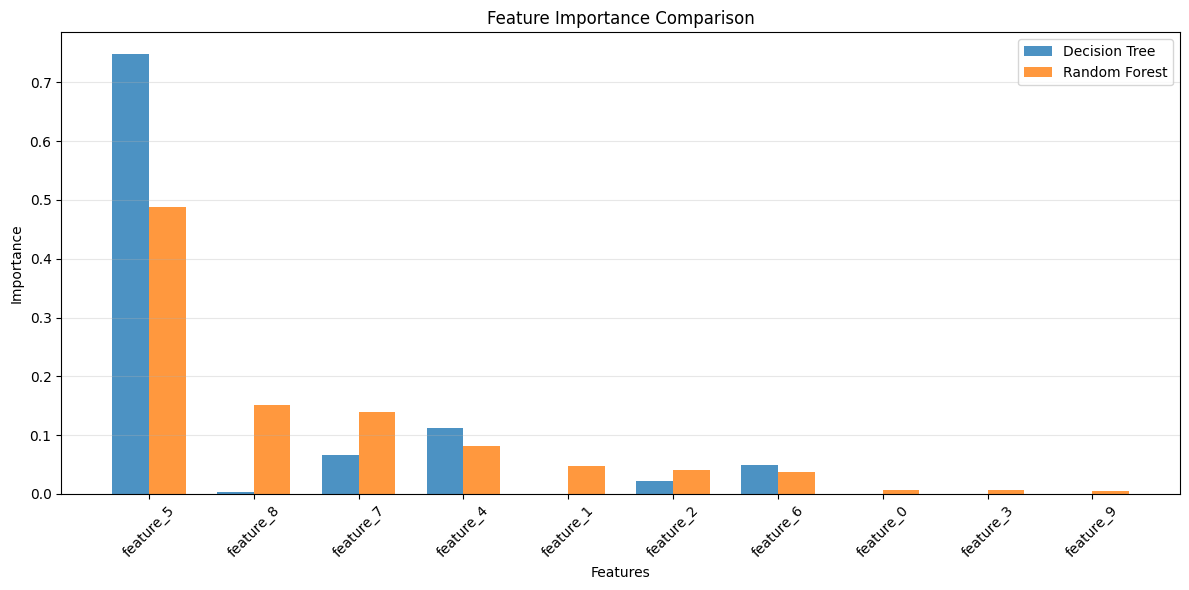

In [13]:
# Visualize feature importance
plt.figure(figsize=(12, 6))
x_pos = np.arange(len(feature_importance_dt))
width = 0.35

plt.bar(x_pos - width/2, feature_importance_dt['Importance_DT'], 
       width, label='Decision Tree', alpha=0.8)
plt.bar(x_pos + width/2, feature_importance_dt['Importance_RF'], 
       width, label='Random Forest', alpha=0.8)

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Comparison')
plt.xticks(x_pos, feature_importance_dt['Feature'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('feature_importance_trees.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'feature_importance_trees.png'")
plt.show()


6. Confusion Matrices
مصفوفات الارتباك

✓ Plot saved as 'confusion_matrices_trees.png'


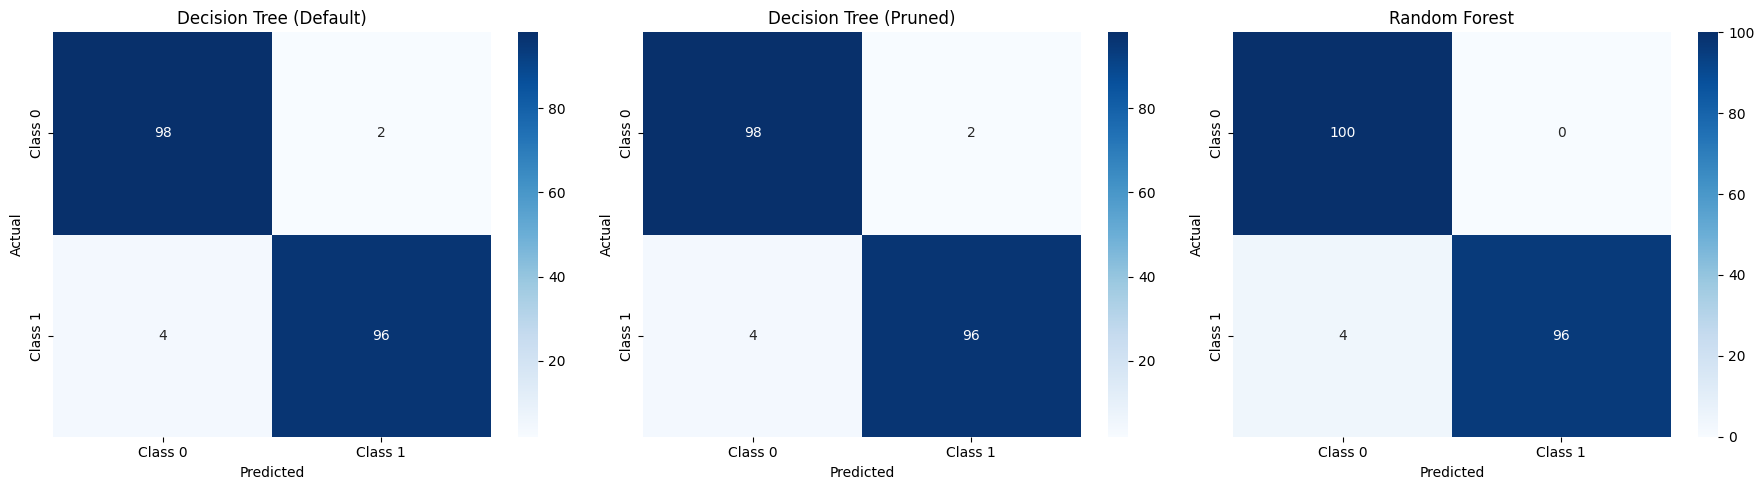

In [14]:
# 6. Confusion Matrices
print("\n" + "=" * 60)
print("6. Confusion Matrices")
print("مصفوفات الارتباك")
print("=" * 60)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_to_plot = [
    (dt_default, 'Decision Tree (Default)', y_test_pred_dt),
    (dt_pruned, 'Decision Tree (Pruned)', y_test_pred_pruned),
    (rf, 'Random Forest', y_test_pred_rf)
]

for idx, (model, title, predictions) in enumerate(models_to_plot):
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_title(title)

plt.tight_layout()
plt.savefig('confusion_matrices_trees.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'confusion_matrices_trees.png'")
plt.show()

In [15]:
# 7. ROC Curve Comparison
print("\n" + "=" * 60)
print("7. ROC Curve Comparison")
print("مقارنة منحنى ROC")
print("=" * 60)


7. ROC Curve Comparison
مقارنة منحنى ROC


In [16]:
# Get probabilities for all models
y_test_proba_dt = dt_default.predict_proba(X_test)[:, 1]
y_test_proba_pruned = dt_pruned.predict_proba(X_test)[:, 1]

In [17]:
# Calculate ROC curves
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_proba_dt)
fpr_pruned, tpr_pruned, _ = roc_curve(y_test, y_test_proba_pruned)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_proba_rf)

In [ ]:
# Calculate AUC scores
auc_dt = roc_auc_score(y_test, y_test_proba_dt)
auc_pruned = roc_auc_score(y_test, y_test_proba_pruned)
auc_rf = roc_auc_score(y_test, y_test_proba_rf)
print(f"\nAUC Scores:")
print(f"Decision Tree (Default): {auc_dt:.4f}")
print(f"Decision Tree (Pruned): {auc_pruned:.4f}")
print(f"Random Forest: {auc_rf:.4f}")

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting AUC Scores | تفسير درجات AUC")
print("=" * 60)

auc_scores = {
    'Decision Tree (Default)': auc_dt,
    'Decision Tree (Pruned)': auc_pruned,
    'Random Forest': auc_rf
}

best_auc_model = max(auc_scores, key=auc_scores.get)
best_auc = auc_scores[best_auc_model]

print(f"\n📊 Best AUC: {best_auc_model} ({best_auc:.4f})")
print(f"   - This model has the best ability to distinguish classes")

print(f"\n🔍 AUC Quality Assessment:")
for model, score in auc_scores.items():
    if score >= 0.9:
        quality = "✅ EXCELLENT"
    elif score >= 0.8:
        quality = "✅ GOOD"
    elif score >= 0.7:
        quality = "⚠️  FAIR"
    else:
        quality = "⚠️  POOR"
    print(f"   - {model}: {score:.4f} ({quality})")

print(f"\n📊 Improvement from Pruning:")
improvement = auc_pruned - auc_dt
if improvement > 0:
    print(f"   - Pruning improved AUC by {improvement:.4f} ({improvement*100:.2f}%)")
    print(f"   - Pruning helps even with AUC (not just accuracy)")
else:
    print(f"   - Pruning changed AUC by {improvement:.4f}")

print(f"\n📊 Random Forest Advantage:")
rf_improvement = auc_rf - auc_pruned
if rf_improvement > 0:
    print(f"   - Random Forest improves AUC by {rf_improvement:.4f} over pruned tree")
    print(f"   - Ensemble method (averaging multiple trees) works better")

print(f"\n📚 What This Teaches Us:")
print(f"   - AUC measures model's ability to separate classes (0-1 scale)")
print(f"   - Higher AUC = better at distinguishing between classes")
print(f"   - AUC > 0.9 is excellent, >0.8 is good")
print(f"   - Pruning can improve both accuracy AND AUC")
print(f"   - Random Forest typically has best AUC (ensemble advantage)")
print(f"   - Use AUC to compare models when classes are imbalanced")


AUC Scores:
Decision Tree (Default): 0.9700
Decision Tree (Pruned): 0.9846
Random Forest: 0.9981



✓ Plot saved as 'roc_curve_trees.png'


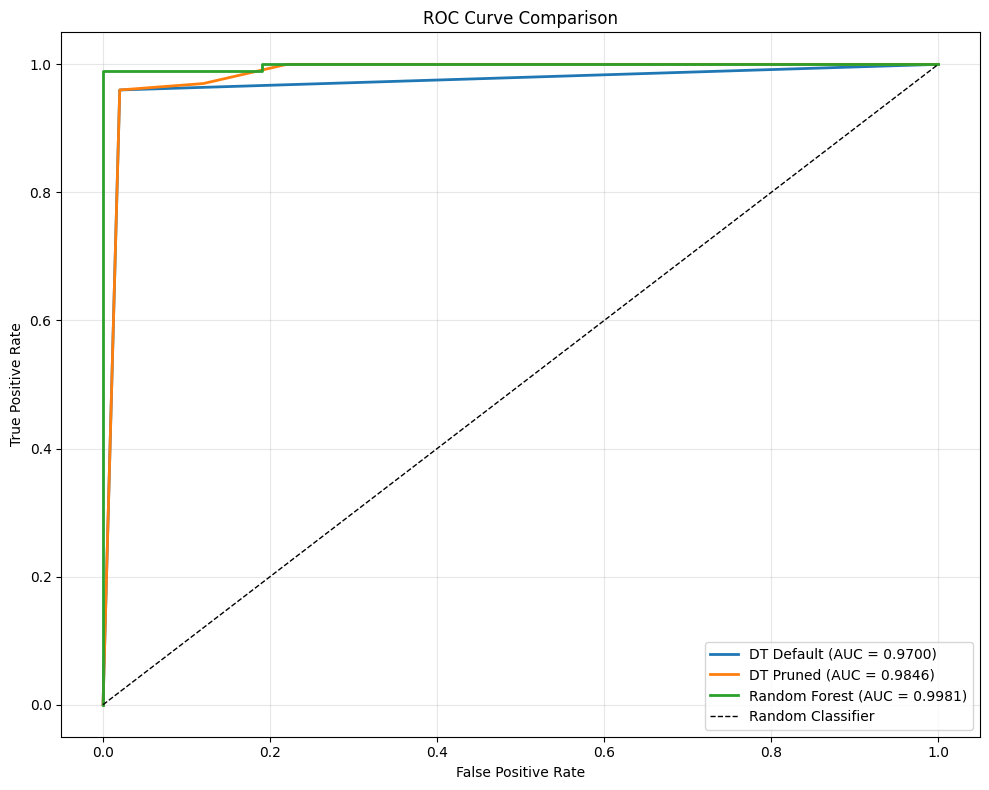

In [19]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, linewidth=2, label=f'DT Default (AUC = {auc_dt:.4f})')
plt.plot(fpr_pruned, tpr_pruned, linewidth=2, label=f'DT Pruned (AUC = {auc_pruned:.4f})')
plt.plot(fpr_rf, tpr_rf, linewidth=2, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve_trees.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'roc_curve_trees.png'")
plt.show()

In [20]:
# 8. Effect of Tree Depth
print("\n" + "=" * 60)
print("8. Effect of Tree Depth on Performance")
print("تأثير عمق الشجرة على الأداء")
print("=" * 60)
max_depths = range(1, 16)
train_scores = []
test_scores = []
for depth in max_depths:
    dt_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_temp.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, dt_temp.predict(X_train)))
    test_scores.append(accuracy_score(y_test, dt_temp.predict(X_test)))

# Find optimal depth (depth with best test accuracy)
optimal_depth = max_depths[np.argmax(test_scores)]
print(f"\nOptimal Max Depth: {optimal_depth}")
print(f"Best Test Accuracy: {max(test_scores):.4f}")


8. Effect of Tree Depth on Performance
تأثير عمق الشجرة على الأداء

Optimal Max Depth: 5
Best Test Accuracy: 0.9700



✓ Plot saved as 'learning_curve_trees.png'


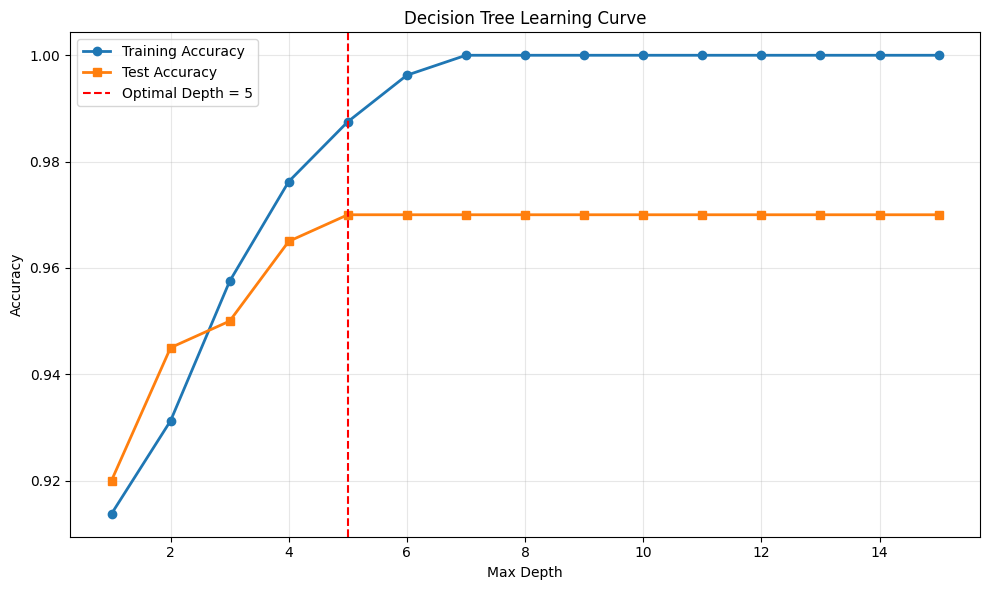

In [21]:
# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, 'o-', label='Training Accuracy', linewidth=2)
plt.plot(max_depths, test_scores, 's-', label='Test Accuracy', linewidth=2)
plt.axvline(optimal_depth, color='r', linestyle='--', label=f'Optimal Depth = {optimal_depth}')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Learning Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('learning_curve_trees.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'learning_curve_trees.png'")
plt.show()

## Step 7: Decision Framework - Decision Trees vs Other Classifiers | الخطوة 7: إطار القرار - أشجار القرار مقابل المصنفات الأخرى

**BEFORE**: You've learned how to build decision trees and Random Forest, but when should you use them vs other classifiers?

**AFTER**: You'll have a clear decision framework to choose between Decision Trees, Random Forest, Logistic Regression, and SVM!

**Why this matters**: Using the wrong classifier can:
- **Poor performance** → Model can't capture the right patterns
- **Overfitting** → Decision trees can overfit easily
- **Wrong complexity** → Using complex models when simple ones work

---

### 🎯 Decision Framework: Which Classifier to Use? | إطار القرار: أي مصنف تستخدم؟

**Key Question**: Should I use **DECISION TREES**, **RANDOM FOREST**, **LOGISTIC REGRESSION**, or **SVM**?

#### Decision Tree:

```
What type of problem do you have?
├─ REGRESSION → Use regression methods (Linear, Polynomial, Ridge, Lasso)
│   └─ Why? Decision trees can do regression, but usually use Random Forest
│
└─ CLASSIFICATION → Check data characteristics:
    ├─ Need interpretability? → Use DECISION TREES ✅
    │   └─ Why? Trees show exact if-then rules
    │
    ├─ Non-linear patterns? → Use DECISION TREES or RANDOM FOREST ✅
    │   └─ Why? Trees handle non-linear patterns naturally
    │
    ├─ Many features? → Use RANDOM FOREST ✅
    │   └─ Why? More robust, less overfitting
    │
    ├─ Linear patterns? → Use LOGISTIC REGRESSION ✅
    │   └─ Why? Simpler, faster, interpretable
    │
    └─ Optimal margin needed? → Use SVM ✅
        └─ Why? Finds optimal separating boundary
```

#### Detailed Decision Process:

```
Step 1: Problem Type
├─ Regression → Use Random Forest Regressor or other regression methods
└─ Classification → Continue to Step 2

Step 2: Interpretability Need
├─ Need exact if-then rules? → Use DECISION TREES
│   └─ Why? Trees show exact decision path
│
└─ Less interpretability OK? → Continue to Step 3

Step 3: Pattern Complexity
├─ Linear patterns → Use LOGISTIC REGRESSION
│   └─ Why? Simpler, faster, works well
│
├─ Non-linear patterns → Continue to Step 4
│
└─ Complex patterns → Use RANDOM FOREST or XGBoost

Step 4: Overfitting Risk
├─ Small dataset, risk of overfitting → Use RANDOM FOREST
│   └─ Why? Less overfitting than single tree
│
└─ Large dataset, can control depth → Use DECISION TREES
    └─ Why? Interpretable, can prevent overfitting with pruning
```

---

### 📊 Comparison Table: Decision Trees vs Other Classifiers | جدول المقارنة

| Method | When to Use | Pros | Cons | Example |
|--------|-------------|------|------|---------|
| **Decision Trees** | Non-linear, interpretable, feature importance | • Interpretable (if-then rules)<br>• Handles non-linear<br>• Feature importance<br>• No scaling needed | • Can overfit<br>• Less stable<br>• Sensitive to data changes | Medical diagnosis, rule-based systems |
| **Random Forest** | Non-linear, robust, many features | • Less overfitting<br>• Robust<br>• Feature importance<br>• Handles many features | • Less interpretable<br>• More complex<br>• Slower | Complex patterns, many features |
| **Logistic Regression** | Linear patterns, interpretable, fast | • Interpretable<br>• Fast<br>• Probability outputs<br>• Simple | • Assumes linearity<br>• Can't handle non-linear | Linear patterns, interpretability critical |
| **SVM** | Optimal margin, non-linear (kernels) | • Optimal margin<br>• Handles non-linear (kernels)<br>• Strong performance | • Less interpretable<br>• Requires scaling<br>• Slower | Optimal separation, complex boundaries |
| **XGBoost** | Best performance, complex patterns | • State-of-the-art<br>• Handles complexity<br>• Feature importance | • Less interpretable<br>• Complex<br>• Slower | Competition-level, best performance needed |

---

### ✅ When to Use Decision Trees | متى تستخدم أشجار القرار

**Use Decision Trees when:**

1. **Interpretability Critical** ✅
   - Need exact if-then rules
   - Need to explain decisions step-by-step
   - **Example**: Medical diagnosis (need to explain: "If age > 50 AND symptom X, then disease Y")

2. **Non-Linear Patterns** ✅
   - Data has complex, non-linear relationships
   - Linear models fail
   - **Example**: Customer segmentation with complex rules

3. **Feature Importance Needed** ✅
   - Need to know which features matter most
   - Trees automatically show importance
   - **Example**: Understanding which factors affect customer churn

4. **Mixed Data Types** ✅
   - Have both numeric and categorical features
   - Trees handle both naturally
   - **Example**: Customer data with age (numeric) and city (categorical)

5. **No Feature Scaling Needed** ✅
   - Don't want to scale features
   - Trees work with raw data
   - **Example**: Quick prototyping, mixed scales

---

### ✅ When to Use Random Forest | متى تستخدم الغابة العشوائية

**Use Random Forest when:**

1. **Overfitting Risk** ✅
   - Single tree overfits
   - Need more robust model
   - **Example**: Small dataset, complex patterns

2. **Many Features** ✅
   - 20+ features
   - Need feature selection
   - **Example**: High-dimensional data

3. **Better Performance Needed** ✅
   - Single tree not good enough
   - Want ensemble benefits
   - **Example**: Need higher accuracy than single tree

4. **Stability Important** ✅
   - Single tree too sensitive to data changes
   - Need stable predictions
   - **Example**: Production systems

---

### ❌ When NOT to Use Decision Trees | متى لا تستخدم أشجار القرار

**Don't use Decision Trees when:**

1. **Linear Patterns** ❌
   - Data has linear relationships
   - **Use Instead**: Logistic Regression (simpler, faster)

2. **Severe Overfitting** ❌
   - Tree overfits badly (train >> test)
   - **Use Instead**: Random Forest (less overfitting)

3. **Optimal Margin Needed** ❌
   - Need maximum margin separation
   - **Use Instead**: SVM (optimal margin)

4. **Best Performance Critical** ❌
   - Need state-of-the-art performance
   - **Use Instead**: XGBoost or Random Forest

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: Medical Diagnosis ✅ DECISION TREES
- **Problem**: Diagnose disease from symptoms
- **Interpretability**: Critical (need to explain diagnosis)
- **Patterns**: Non-linear (complex symptom combinations)
- **Decision**: ✅ Use Decision Trees
- **Reasoning**: Interpretability critical, non-linear patterns, need if-then rules

#### Example 2: Customer Churn (Complex Patterns) ✅ RANDOM FOREST
- **Problem**: Predict customer churn
- **Patterns**: Complex, non-linear
- **Overfitting**: Risk with single tree
- **Decision**: ✅ Use Random Forest
- **Reasoning**: Complex patterns, overfitting risk, need robust model

#### Example 3: Email Spam Detection ✅ LOGISTIC REGRESSION
- **Problem**: Classify emails as spam/not spam
- **Patterns**: Linear (word frequencies linearly related)
- **Interpretability**: Important but not critical
- **Decision**: ✅ Use Logistic Regression
- **Reasoning**: Linear patterns, simpler than trees, probability outputs useful

#### Example 4: Image Classification ❌ NOT DECISION TREES
- **Problem**: Classify images (cat/dog/bird)
- **Patterns**: Highly complex, pixel-level
- **Decision**: ❌ Use Neural Networks or Random Forest
- **Reasoning**: Too complex for single trees, need deep learning or ensemble

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Interpretability → Decision Trees** - Use when you need if-then rules
2. **Overfitting → Random Forest** - Use when single tree overfits
3. **Linear → Logistic Regression** - Use for linear patterns
4. **Complex → Random Forest/XGBoost** - Use for complex patterns
5. **Feature importance** - Trees show which features matter
6. **No scaling needed** - Trees work with raw data
7. **Try both** - Sometimes try single tree and Random Forest, compare

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Medical diagnosis with 15 symptoms
- **Interpretability**: Critical (need to explain diagnosis)
- **Patterns**: Non-linear (complex symptom interactions)
- **Decision**: ✅ Decision Trees (interpretability critical, non-linear patterns)

**Scenario 2**: Customer segmentation with 50 features
- **Interpretability**: Less important
- **Patterns**: Complex, non-linear
- **Overfitting**: Risk with single tree
- **Decision**: ✅ Random Forest (many features, overfitting risk, complex patterns)

**Scenario 3**: Loan approval (linear relationship)
- **Patterns**: Linear (credit score, income linearly related to approval)
- **Interpretability**: Important
- **Decision**: ✅ Logistic Regression (linear patterns, interpretable, simpler)

---

**Connection to Next Steps**: 
- 📓 **Example 3: SVM** - For optimal margins and kernel-based non-linear patterns
- 📓 **Unit 5, Example 2: Boosting** - Extends trees with XGBoost and LightGBM
- 📓 **Unit 5, Example 1: Grid Search** - For tuning tree hyperparameters


In [22]:
# Note: optimal_depth was calculated in cell 23 above
# This cell summarizes the results
print("\n" + "=" * 60)
print("Example 2 Complete! ✓")
print("اكتمل المثال 2! ✓")
print("=" * 60)


Example 2 Complete! ✓
اكتمل المثال 2! ✓
